# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt_plot
import cv2
from PIL import Image

#### Viewing the original Image

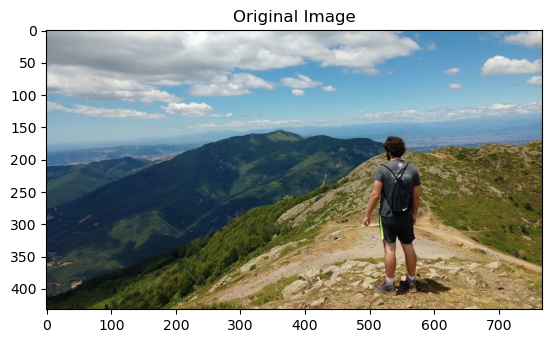

In [2]:
image = np.asarray(Image.open('hw3_image.jpeg'))
plt_plot.title("Original Image")
plt_plot.imshow(image)
plt_plot.show()

### Below method "implement_PCA(first_N_principal_components, image)" can be used to implement Principal Component Analysis from scratch.

This method basically takes the list of principal components and image path and then internally computes eigen values and eigen vectors to calculate accumulative variance with the number of components and returns RGB variances.

##### Parameters:
-> first_N_principal_components: list of number of principal components to which the image is to be reduced.<br>
-> image: path of the input image.

##### Returns:
-> images_after_PCA: list of all the images after implementing PCA wrt principal components.<br>
-> blue_channel_variances: accumulative variances for blue channel.<br>
-> green_channel_variances: accumulative variances for green channel.<br>
-> red_channel_variances: accumulative variances for red channel.<br>

In [3]:
def implement_PCA(first_N_principal_components, image):
    
    blue_channel_variances = []
    green_channel_variances = []
    red_channel_variances = []
    
    images_after_PCA = []
    combined_accumulative_variances = []
    
    # Executing PCA for all the principal components in the list
    for principal_components in first_N_principal_components:
        # Splitting the image into three RGB channels using CV2
        input_image = cv2.imread(image)
        blue_channel, green_channel, red_channel = cv2.split(input_image)

        # Combining all the three channels in one np array
        combined_channels_RGB = np.array([blue_channel, green_channel, red_channel])

        accumulative_variances = []
        approximations = []
        for i in range(3):
            approximations.append([])

        i = 0
        # Below loop will iterate for all the three color channels and will calculate all the PCA components like eigen values
        # and eigen vectors for all the RGB channels
        for individual_color_channel in combined_channels_RGB:

            #calulating mean for each color channel
            mean_individial_color_channel = np.mean(individual_color_channel)
            mean_individial_color_channel_bar = individual_color_channel - mean_individial_color_channel
            #calculating the covariance for each color channel
            covariance_individual_channel = np.cov(mean_individial_color_channel_bar, bias=False, fweights=None, rowvar = False, aweights=None, y= None)
            eigenvalues_single_color_channel, eigenvectors_single_color_channel = np.linalg.eigh(covariance_individual_channel, UPLO='L')

            # Appending (sum of eigenvalues w.r.t principal components / sum of all eigenvalues) to the list of accumulative variances after reversing the eigen values
            eigenvalues_single_color_channel = np.flip(eigenvalues_single_color_channel, axis=None)
            eigenvectors_single_color_channel = eigenvectors_single_color_channel[:,np.argsort(eigenvalues_single_color_channel, order=None, axis=- 1)]
            accumulative_variances.append(sum(eigenvalues_single_color_channel[0:principal_components])/sum(eigenvalues_single_color_channel))

            # Gather desired number of components and project into original space
            required_principal_components = eigenvectors_single_color_channel[:,0:principal_components]

            # Getting the dot product of both the vectors(mean bar and required principal components)
            individual_dot_vector_product = np.dot(mean_individial_color_channel_bar, required_principal_components, out=None) 

            # Getting the sum of dot product of (eigen vectors and the Transpose of required principal components) and single color channel mean
            dotproduct_mean_sum = np.dot(individual_dot_vector_product, required_principal_components.T, out=None) + mean_individial_color_channel
            approximations[i].append(dotproduct_mean_sum)
            i = i + 1

        # Combine channels into new, compressed image and print image
        final_compressed_image = (np.dstack((approximations[2][0], approximations[1][0], approximations[0][0]))).astype(np.uint8)
        
        
        #combined_accumulative_variances.append(accumulative_variances)
        images_after_PCA.append(final_compressed_image)
        blue_channel_variances.append(accumulative_variances[0])
        green_channel_variances.append(accumulative_variances[1])
        red_channel_variances.append(accumulative_variances[2])
    
    return images_after_PCA, blue_channel_variances, green_channel_variances, red_channel_variances


#### Calling the method implement_PCA() to get the RGB variances and list of the images after performing PCA


In [4]:
first_N_principal_components = [1, 4, 20, 50, 100, 200, 300, 400, 800, 1000]
list_of_images_after_PCA, blue_channel_variances, green_channel_variances, red_channel_variances = implement_PCA(first_N_principal_components, 'hw3_image.jpeg')


## Using the above values to plot the images

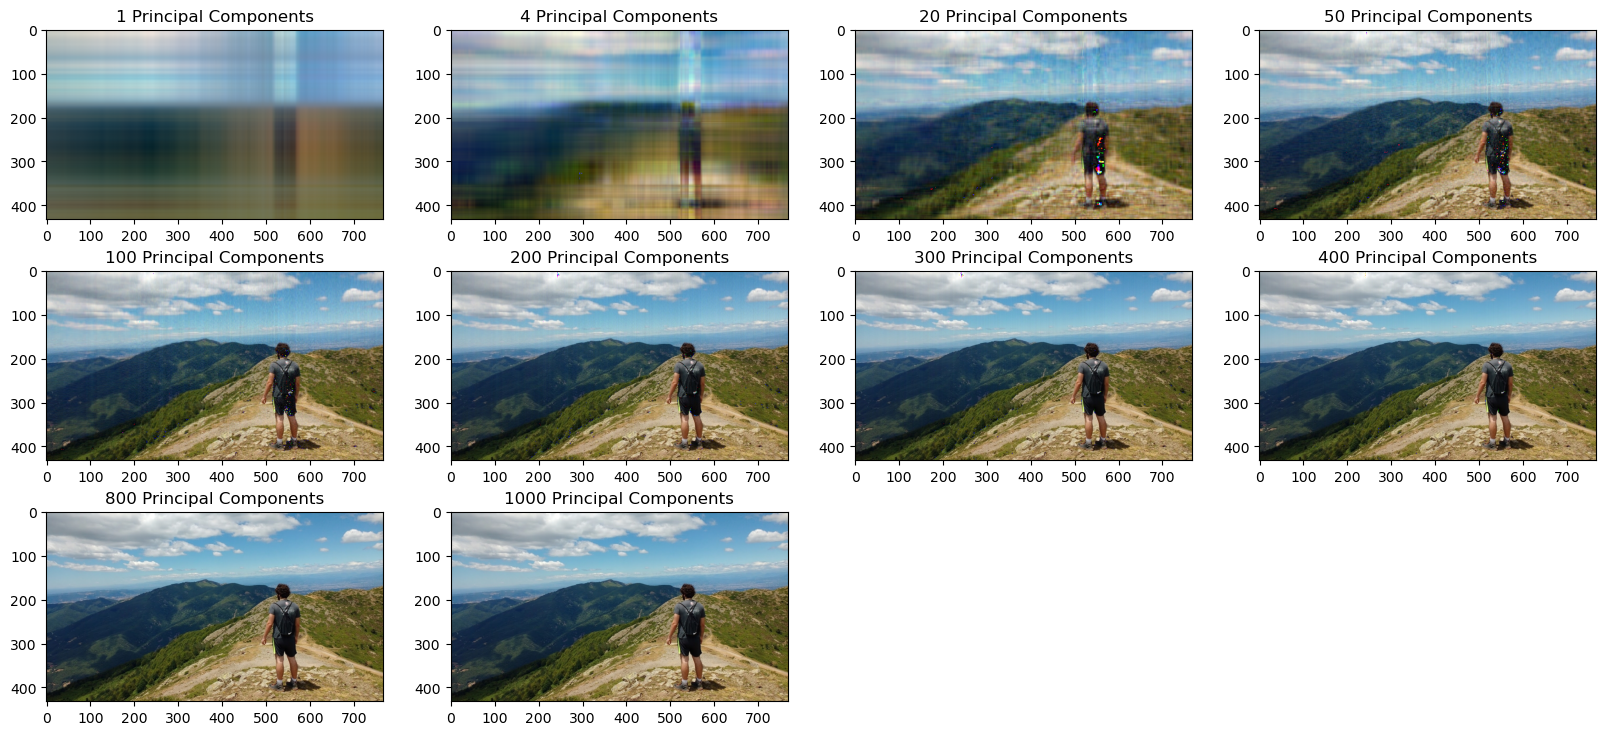

In [6]:
image_plot = plt_plot.figure(figsize=(20, 12), frameon=True, edgecolor=None)
k = 0
for single_image in list_of_images_after_PCA:
    m = k + 1
    image_plot.add_subplot(4, 4, m)
    plt_plot.imshow(single_image)
    plt_plot.title(f'{first_N_principal_components[k]} Principal Components')
    k = k + 1

#### After 200 principal components, the image seems to look like the original image, except very few pixels. We can consider that maximum variance is being apprehended in the first 200 components. The same conculsion can be made from the graph below. The RGB variance lines have almost converged after 200 Principal components.

### Plotting Principal Components against Accumulative Variance

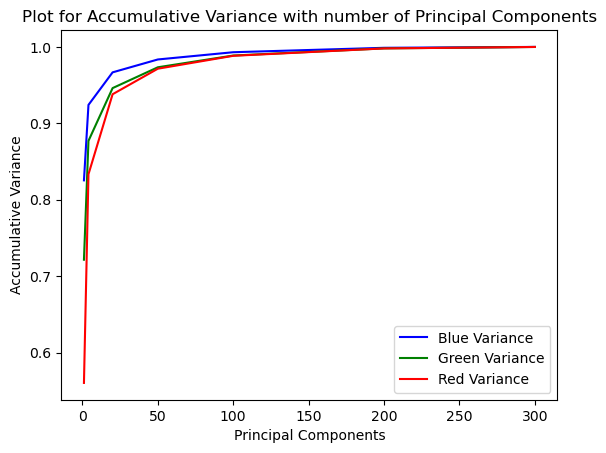

In [8]:
scale = 7
plt_plot.plot(first_N_principal_components[0:scale], blue_channel_variances[0:scale], color='blue')
plt_plot.plot(first_N_principal_components[0:scale], green_channel_variances[0:scale], color='green')
plt_plot.plot(first_N_principal_components[0:scale], red_channel_variances[0:scale], color='red')
plt_plot.title('Plot for Accumulative Variance with number of Principal Components')
plt_plot.xlabel('Principal Components')
plt_plot.ylabel('Accumulative Variance')
plt_plot.legend(('Blue Variance', 'Green Variance', 'Red Variance'))


Maximum of the Variance is being captured by the first 200 components in all the colors, so we have depicted the graph till first 300 components. If we try to plot the graph for more number of components, the scale of x axis will be too high to notice the differences in the three lines for the colors. 

From the graph we can also deduce that at first 50 components, 90% of the variance is covered. And this is also evident with the images because the image seems to be visible and we can easily make out the different structures in it i.e. the mountains, the man, the cloud, its shadow etc. 

### References
1. https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html
2. https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/
3. https://www.section.io/engineering-education/image-compression-using-pca/

# Question 2

In [10]:
import numpy as np
import pandas as pd

### 1.
### After reading the additional material, I would choose Multinomial Naive Bayes as my model. 

### Getting and merging data 

In [11]:
data=pd.read_csv('us.txt', header=None)
data1=pd.read_csv('greek.txt', header=None)
data2=pd.read_csv('japan.txt',header=None)
data3=pd.read_csv('arabic.txt',header=None)

In [12]:
data = data.rename(columns={0: 'Name'})

In [13]:
data1 = data1.rename(columns={0: 'Name'})
data2 = data2.rename(columns={0: 'Name'})
data3 = data3.rename(columns={0: 'Name'})


In [14]:
data['cat'] = 1
data1['cat'] = 2
data2['cat'] = 3
data3['cat'] = 4

In [15]:
frames = [data, data1, data2, data3]

result = pd.concat(frames)

In [16]:
result

,Name,cat
0,Timothy Moses,1
1,Anna Barajas,1
2,James Caldwell,1
3,Mr. Michael Cole,1
4,Jeffrey Collier,1
...,...,...
995,يسرى فراهيد,4
996,خاشعة قيس عيلان,4
997,السيدة لوليا هندية,4
998,الأستاذ مُنير الحواش,4


### Spliting them into training (70%) and testing (30%) with shuffle = True

In [17]:
from sklearn.model_selection import train_test_split
X = result.iloc[:, 0]
y = result.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, shuffle = True)

### Using CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()



In [19]:
XX_train_1=cv.fit_transform(X_train.values)

In [20]:
XX_train_1= XX_train_1.toarray()

In [21]:
XX_train_1.shape

(2800, 2523)

In [22]:
tr=[X_train, y_train]
train = pd.concat(tr, axis=1)

In [23]:
train

,Name,cat
336,الآنسة ابتكار زحلاوي,4
540,伊藤 花子,3
332,Betty Franklin,1
852,Claudia Green,1
36,Σπυριδούλα Πορφυριάδου,2
...,...,...
835,Cassie Williams,1
264,فوزي ارناؤوط,4
653,Σαμουήλ Κερασοβίτης,2
607,山本 桃子,3


### Implementing Multinomial Naive Bayes
### Getting Prior and Conditional Probabilities 

In [24]:
def get_priors(train):
    pts = np.zeros(4)
    condi = np.zeros((4,XX_train_1.shape[1]),dtype=np.float64)
    for i in range(4):
        temp = XX_train_1[train['cat'] == (i + 1)]
        pts[i] = len(temp) / XX_train_1.shape[0]
        ##print(XX_train_1.shape)
        condi[i,:] = np.mean(temp,axis=0) + 1e-6
        
    return pts, condi

In [25]:
from sklearn import metrics
def predict_single(X,pri,condi):
    all_probabilities= []
    for i in range(4):
        poste = np.log(condi[i]) * X
        total_poste = poste.sum()
        total_probability = total_poste + np.log(pri[i])
        all_probabilities.append(total_probability)
        
    return np.argmax(all_probabilities) + 1
        

def GNaiveBayes(X,y):
    pri,condi = get_priors(train)
    X = cv.transform(X)
    X = X.toarray()
    all_preds = [predict_single(xi,pri,condi) for xi in X]
    
    return metrics.accuracy_score(y,all_preds)

In [26]:
GNaiveBayes(X_test, y_test)

0.9208333333333333

#### Accuracy is 0.9208333333333333 (As shown above)


References:
[1]: Brownlee, Jason. “Metrics to Evaluate Machine Learning Algorithms in Python.” MachineLearningMastery.com, 30 Aug. 2020, https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/. 
[2]. Team, Great Learning. “Multinomial Naive Bayes Explained.” Great Learning Blog: Free Resources What Matters to Shape Your Career!, 31 Oct. 2022, https://www.mygreatlearning.com/blog/multinomial-naive-bayes-explained/. 
[3]: Kharwal, Aman. “Multinomial Naive Bayes in Machine Learning: Aman Kharwal.” Thecleverprogrammer, 6 Aug. 2021, https://thecleverprogrammer.com/2021/08/06/multinomial-naive-bayes-in-machine-learning/. 
[4]. 